In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.rcParams['font.family'] = 'NanumGothic'
df_school = pd.read_excel('../Datasets/2023년_학교현황(초)_부산광역시교육청.xlsx')

df_club = pd.read_excel('../Datasets/2023년_ 동아리 활동 현황(초)_부산광역시교육청.xlsx')

#df_club["창의적 체험활동 동아리 동아리수"].astype('int')
#df_club["학생 자율 동아리 동아리수"].astype('int')

df_club["총 동아리수"] = df_club["창의적 체험활동 동아리 동아리수"] + df_club["학생 자율 동아리 동아리수"]

df_club.head()

/home/wp/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,창의적 체험활동 동아리 동아리수,창의적 체험활동 동아리 참여학생수,창의적 체험활동 동아리 지도교사수,창의적 체험활동 동아리 자원봉사 \n 또는 외부강사수,창의적 체험활동 동아리 동아리 활동 \n 예산 지원 현황,학생 자율 동아리 동아리수,학생 자율 동아리 참여학생수,학생 자율 동아리 지도교사수,학생 자율 동아리 자원봉사 \n 또는 외부강사수,학생 자율 동아리 동아리 활동 \n 예산 지원 현황,총 동아리수
0,부산광역시교육청,교육부,부산광역시 연제구,S000003559,부산교육대학교부설초등학교,2,국립,N,NaN,30.0,400.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
1,부산광역시교육청,부산광역시서부교육지원청,부산광역시 중구,S020000625,광일초등학교,2,공립,N,NaN,15.0,295.0,15.0,0.0,0.0,2.0,42.0,2.0,0.0,1000000.0,17.0
2,부산광역시교육청,부산광역시서부교육지원청,부산광역시 중구,S020000626,남성초등학교,2,사립,N,NaN,10.0,470.0,10.0,5.0,0.0,1.0,79.0,1.0,7.0,10000000.0,11.0
3,부산광역시교육청,부산광역시남부교육지원청,부산광역시 남구,S020000628,대남초등학교,2,공립,N,NaN,11.0,211.0,11.0,0.0,850000.0,3.0,59.0,4.0,0.0,1400000.0,14.0
4,부산광역시교육청,부산광역시남부교육지원청,부산광역시 남구,S020000629,대연초등학교,2,공립,N,NaN,38.0,933.0,38.0,0.0,0.0,2.0,40.0,2.0,5.0,8000000.0,40.0


<Axes: title={'center': '지역별 평균 동아리수'}, xlabel='area', ylabel='avg_club'>

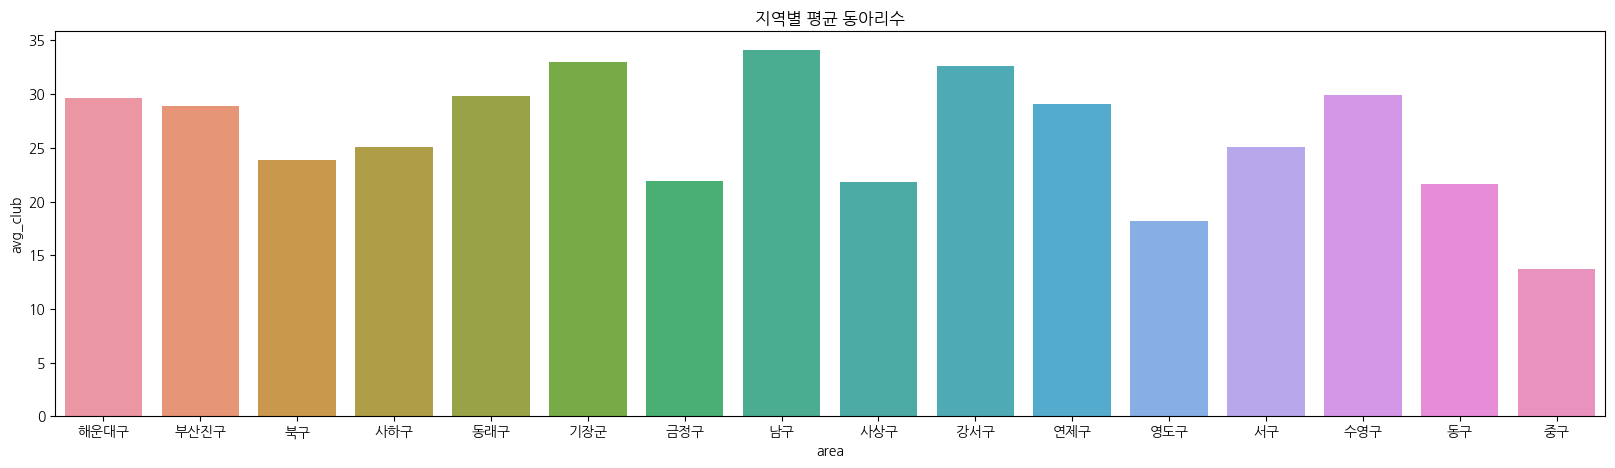

In [4]:
# 동아리 DF의 불필요 columns 삭제
df_club.drop(columns=["시도교육청", "지역교육청", "지역", "정보공시 \n 학교코드", "학교급코드",
                     '설립구분',
                     '제외여부',
                     '제외사유'], errors='ignore', inplace=True)

# 동아리와 학교현황의 Join(inner), key="학교명"
df = pd.merge(left=df_school, right=df_club, how='inner', on="학교명")
df["지역"] = df["지역"].str.replace("부산광역시 ", "")
# 지역으로 groupby를 진행하고 해당 지역의 동아리 수 평균과 지역의 개수를 DF로 재정의
df_group_by = df[["지역", "총 동아리수"]].groupby(by="지역", as_index=False).agg(
    {'총 동아리수': ['mean', 'size']}
)
df_group_by.columns = ['area', 'avg_club', 'count']
df_group_by = df_group_by.sort_values(["count"], ascending=False)

fig = plt.figure(figsize=(20,5))
plt.title("지역별 평균 동아리수")
#sns.barplot(x="area", y="count", data=df_group_by)
sns.barplot(x="area", y="avg_club", data=df_group_by)
#sns.stripplot(x='area', y='count', jitter=False, data=df_group_by)